In [1]:
import sys
sys.path.append('../')
import mobipy
from mobipy import conc
import matplotlib.pyplot as plt

In [2]:
app = mobipy.Model_Application.build_from_model_and_data_file('models/simplyc_model.txt', 'models/simplyq_data.dat')

In [3]:
app.run()

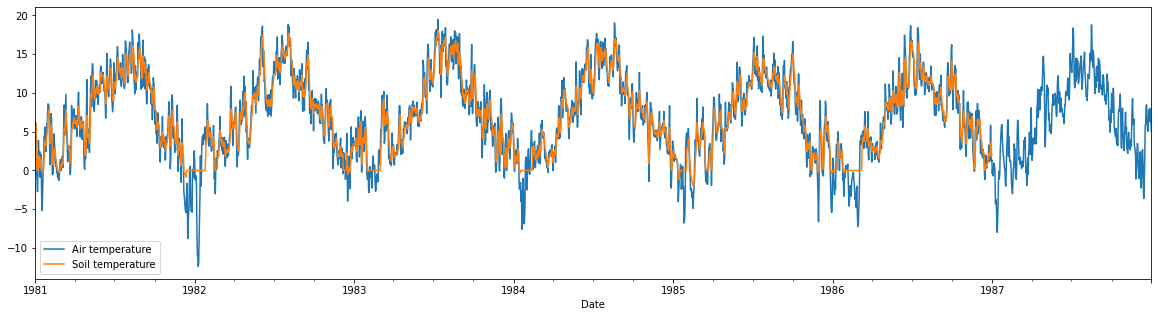

In [4]:
air_temp = app.sn.air.temp[[]]
soil_temp = app.st.soil.temp[['Arable']]

air_temp = air_temp[air_temp.index < '1988-1-1']

fig,ax = plt.subplots(1,1)
fig.set_size_inches(20,5)

air_temp.plot(ax=ax)
soil_temp.plot(ax=ax)
ax.legend()

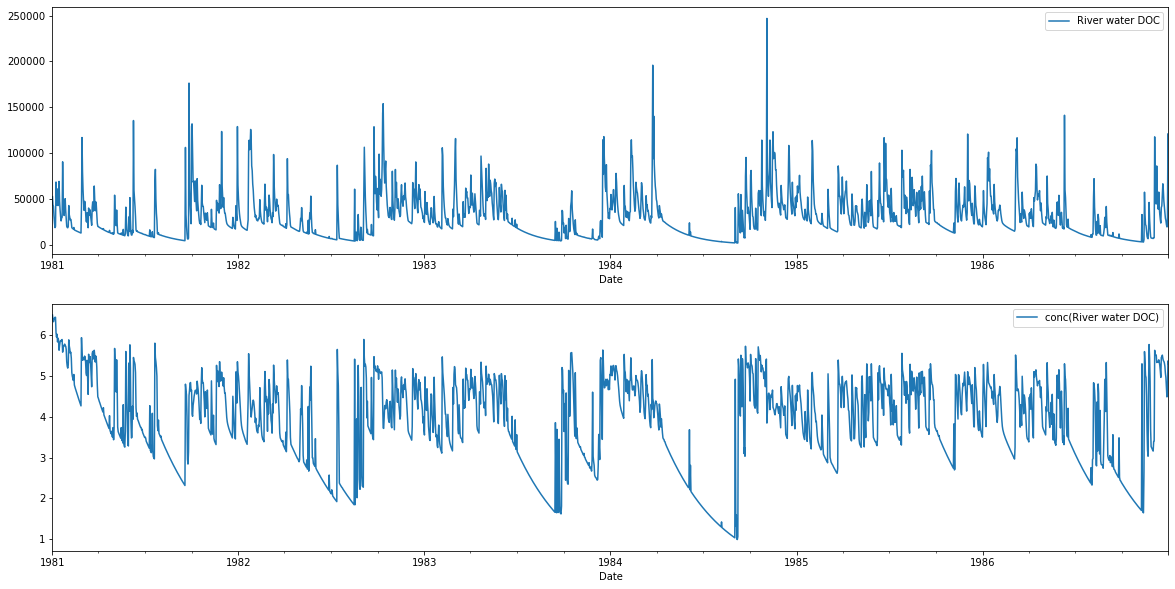

In [5]:
river_doc      = app.river.water.oc[["Coull"]]
river_doc_conc = conc(app.river.water.oc)[["Coull"]]

fig,ax = plt.subplots(2,1)
fig.set_size_inches(20,10)

river_doc.plot(ax=ax[0])
river_doc_conc.plot(ax=ax[1])
ax[0].legend()
ax[1].legend()

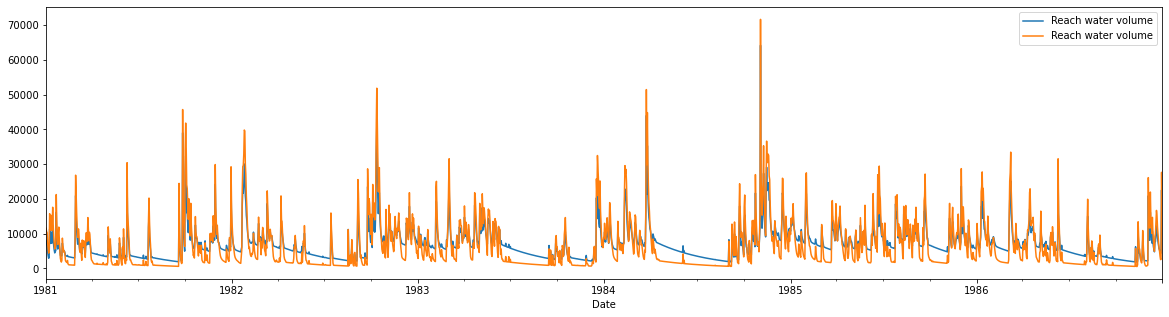

In [6]:
before = app.river.water[["Coull"]]     # Read the time series of river.water (volume)
app.sw.bfi[[]] = 0.1                    # Set base flow index to 0.1
app.sw.tc_s[['Arable']] = 5             # Set water time constant for Arable land class to 5
app.run()
after = app.river.water[["Coull"]]      # Read the time series again.

fig,ax = plt.subplots(1,1)
fig.set_size_inches(20,5)

before.plot(ax=ax)
after.plot(ax=ax)
ax.legend()